#**Bank Customer Churn  Model**

#Objective

1.  Data Encoding
2.  Feature Scaling
3.  Handling Imbalance Data
   *   Random Under Sampling
   *   Random Over  Sampling
5.  Support Vector Machine Classifier
6.  Grid Search for Hyperparameter Tunning





#Import Library

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import Data


In [101]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

#Analyse Data

In [102]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [104]:
df.duplicated('CustomerId').sum()

0

In [105]:
df.set_index('CustomerId')

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


#Encoding

In [107]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [108]:
df.replace({'Geography': {'France' : 2, 'Germany' : 1,'Spain': 0}}, inplace=True)

In [109]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [110]:
df.replace({'Gender' : {'Male' : 1, 'Female' : 0}}, inplace= True)

In [111]:
df['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


In [112]:
df.replace({'Num Of Products': {1:0, 2:1, 3:1, 4:1}}, inplace= True)

In [113]:
df['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945


In [114]:
df['Is Active Member'].value_counts()

,count
Is Active Member,
1,5151
0,4849


In [115]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

,count
Churn,
0,3117
1,500


In [116]:
df['Zero Balance'] = np.where(df['Balance']==0,1,0)

<Axes: >

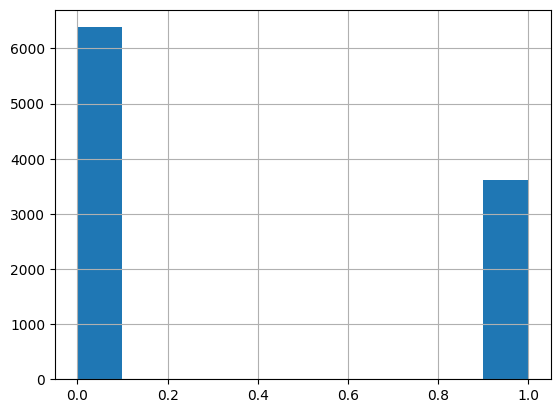

In [117]:
df['Zero Balance'].hist()

In [118]:
df.groupby(['Churn','Geography']).count()

CustomerId  Surname  CreditScore  Gender   Age  Tenure  \
Churn Geography                                                           
0     0                2064     2064         2064    2064  2064    2064   
      1                1695     1695         1695    1695  1695    1695   
      2                4204     4204         4204    4204  4204    4204   
1     0                 413      413          413     413   413     413   
      1                 814      814          814     814   814     814   
      2                 810      810          810     810   810     810   

                 Balance  Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                                
0     0             2064             2064             2064              2064   
      1             1695             1695             1695              1695   
      2             4204             4204             4204              4204   
1     0              413              413              413               413   
      1              814              814              814               814   
      2              810              810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

#Define Label and Features

In [119]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [120]:
x= df.drop(['Surname','Churn'],axis=1)

In [121]:
y = df['Churn']

In [122]:
x.shape,y.shape

((10000, 12), (10000,))

#Handling Imbalance Data



class imbalance is a common in machine learning, specially in clssification problems as machine learning algorithms are designed to maximize accuracy and reduce errors. if the data set is imbalance then in such cases just by predicting the majority class we get a pretty high accuracy, but fails to capture minority class, whih is most often the point of creating model in the first place lik in

1.   Fraud detection
2.   Spam filtering
3.   Disease Screening
4.   Online sales churn
5.   Advertising Click throughs





**UnderSampling** can be defines as removing some observations of the majority class. this is done until the majority and minority class is balanced out.

Undersampling can be good choice when you have ton of data-think millions of rows. But a drawback of undersampling is that we ae removing information that may be valueable.

In undersampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

A drawback to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

**Oversampling** can be define as adding more copies to the minority class. Oversampling can be a good choice when you don't have ton of data to work with.

The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfiting.





In [123]:
df['Churn'].value_counts()

,count
Churn,
0,7963
1,2037


<Axes: xlabel='Churn', ylabel='count'>

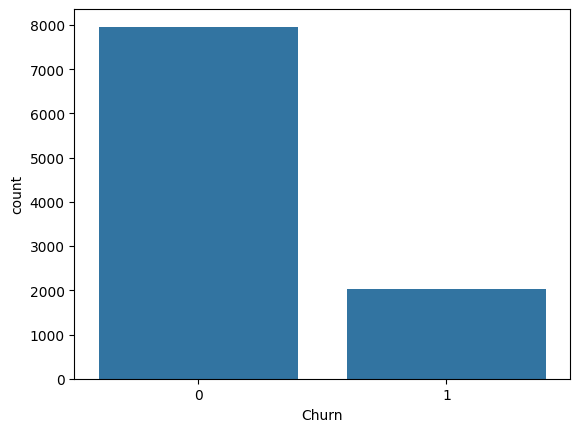

In [124]:
sns.countplot(x ='Churn', data = df)

In [125]:
x.shape,y.shape

((10000, 12), (10000,))

#Random Under Sampling

In [126]:
from imblearn.under_sampling import RandomUnderSampler

In [127]:
rus = RandomUnderSampler(random_state=2529)

In [128]:
x_rus,y_rus = rus.fit_resample(x,y)

In [129]:
x_rus.shape,y_rus.shape, x.shape,y.shape

((4074, 12), (4074,), (10000, 12), (10000,))

In [130]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [131]:
y_rus.value_counts()

,count
Churn,
0,2037
1,2037


<Axes: ylabel='Frequency'>

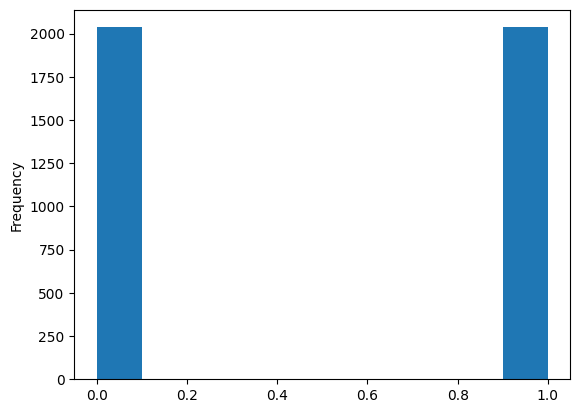

In [132]:
y_rus.plot(kind='hist')

#Random Over Sampling

In [133]:
from imblearn.over_sampling import RandomOverSampler

In [134]:
ros = RandomOverSampler(random_state=2529)

In [135]:
x_ros,y_ros = ros.fit_resample(x,y)

In [136]:
x_ros.shape,y_ros.shape, x.shape,y.shape

((15926, 12), (15926,), (10000, 12), (10000,))

In [137]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [138]:
y_ros.value_counts()

,count
Churn,
1,7963
0,7963


<Axes: ylabel='Frequency'>

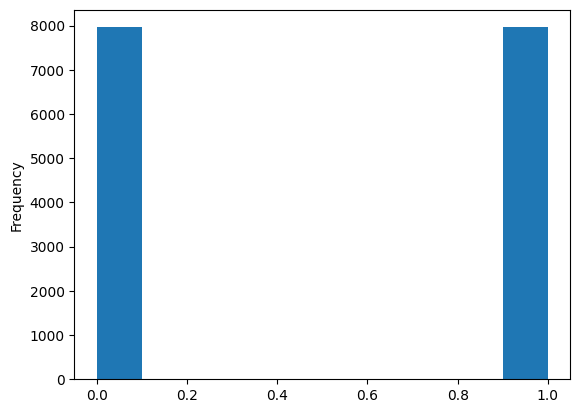

In [139]:
y_ros.plot(kind='hist')

#Train Test Split

In [140]:
from sklearn.model_selection import train_test_split

#Split Original Data

In [141]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2529)

#Split Random Under Sample Data

In [142]:
x_train_rus,x_test_rus,y_train_rus,y_test_rus = train_test_split(x_rus,y_rus,test_size=0.3,random_state=2529)

#Split Random Over Sample Data



In [143]:
x_train_ros,x_test_ros,y_train_ros,y_test_ros = train_test_split(x_ros,y_ros,test_size=0.3,random_state=2529)

#Standardize Features

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
sc = StandardScaler()

#Standardize Original Data

In [146]:
x_train_sc = sc.fit_transform(x_train)

In [147]:
x_test_sc = sc.fit_transform(x_test)

#Standardize Random Under Sample Data

In [148]:
x_train_rus_sc = sc.fit_transform(x_train_rus)

In [149]:
x_test_rus_sc = sc.fit_transform(x_test_rus)

#Standardize Random Over Sample Data

In [150]:
x_train_ros_sc = sc.fit_transform(x_train_ros)

In [151]:
x_test_ros_sc = sc.fit_transform(x_test_ros)

#Support Vector Machine Classifier

In [152]:
from sklearn.svm import SVC

In [153]:
svc = SVC()

In [154]:
svc.fit(x_train_sc,y_train)

SVC()

In [155]:
y_pred = svc.predict(x_test_sc)

#Model Accuracy

In [156]:
from sklearn.metrics import confusion_matrix,classification_report

In [157]:
confusion_matrix(y_test,y_pred)

array([[2388,   26],
       [ 433,  153]])

In [158]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.85      0.26      0.40       586

    accuracy                           0.85      3000
   macro avg       0.85      0.63      0.66      3000
weighted avg       0.85      0.85      0.81      3000



#Hyperparameter Tunning

In [159]:
from sklearn.model_selection import GridSearchCV

In [160]:
param_grid = {'C' : [0.1,1,10], 'gamma' : [1,0.1,0.01], 'kernel' : ['rbf'] , 'class_weight' : ['balanced']}

In [161]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3 , cv = 2)
grid.fit(x_train_sc,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.211 total time=   1.4s
[CV 2/2] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.793 total time=   1.8s
[CV 1/2] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf;, score=0.734 total time=   1.9s
[CV 2/2] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf;, score=0.701 total time=   1.6s
[CV 1/2] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf;, score=0.723 total time=   1.1s
[CV 2/2] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf;, score=0.686 total time=   1.1s
[CV 1/2] END C=1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.786 total time=   1.5s
[CV 2/2] END C=1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.787 total time=   1.4s
[CV 1/2] END C=1, class_weight=balanced, gamma=0.1, kernel=rbf;, score=0.737 total time=   0.9s
[CV 2/2] END C=1, class_weight=balanced, gamma=0.1, kernel=rbf;, score

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=3)

In [162]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [163]:
grid_predictions = grid.predict(x_test_sc)

In [164]:
confusion_matrix(y_test,grid_predictions)

array([[2300,  114],
       [ 478,  108]])

In [165]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      2414
           1       0.49      0.18      0.27       586

    accuracy                           0.80      3000
   macro avg       0.66      0.57      0.58      3000
weighted avg       0.76      0.80      0.77      3000



#Model with Random Under Sampling

In [166]:
svc_rus = SVC()

In [167]:
svc_rus.fit(x_train_rus_sc,y_train_rus)

SVC()

In [168]:
y_pred_rus = svc_rus.predict(x_test_rus_sc)

#Model Accuracy

In [169]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[441, 186],
       [171, 425]])

In [170]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       627
           1       0.70      0.71      0.70       596

    accuracy                           0.71      1223
   macro avg       0.71      0.71      0.71      1223
weighted avg       0.71      0.71      0.71      1223



#Hyperparameter Tunning

In [171]:
param_grid = {'C' : [0.1,1,10], 'gamma' : [1,0.1,0.01,], 'kernel' : ['rbf'] , 'class_weight' : ['balanced']}

In [172]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=3 , cv = 2)
grid_rus.fit(x_train_rus_sc,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.506 total time=   0.2s
[CV 2/2] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.505 total time=   0.3s
[CV 1/2] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf;, score=0.704 total time=   0.2s
[CV 2/2] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf;, score=0.731 total time=   0.2s
[CV 1/2] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf;, score=0.689 total time=   0.3s
[CV 2/2] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf;, score=0.696 total time=   0.4s
[CV 1/2] END C=1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.644 total time=   0.4s
[CV 2/2] END C=1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.639 total time=   0.4s
[CV 1/2] END C=1, class_weight=balanced, gamma=0.1, kernel=rbf;, score=0.708 total time=   0.3s
[CV 2/2] END C=1, class_weight=balanced, gamma=0.1, kernel=rbf;, score

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=3)

In [173]:
print(grid_rus.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.01)


In [174]:
grid_predictions_rus = grid_rus.predict(x_test_rus_sc)

In [175]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[431, 196],
       [169, 427]])

In [176]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70       627
           1       0.69      0.72      0.70       596

    accuracy                           0.70      1223
   macro avg       0.70      0.70      0.70      1223
weighted avg       0.70      0.70      0.70      1223



#Model with Random Over Sampling

In [177]:
svc_ros = SVC()

In [178]:
svc_ros.fit(x_train_ros_sc,y_train_ros)

SVC()

In [179]:
y_pred_ros = svc_ros.predict(x_test_ros_sc)

#Model Accuracy

In [180]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[1798,  581],
       [ 536, 1863]])

In [181]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      2379
           1       0.76      0.78      0.77      2399

    accuracy                           0.77      4778
   macro avg       0.77      0.77      0.77      4778
weighted avg       0.77      0.77      0.77      4778



#Hyperparameter Tunning

In [183]:
param_grid = {'C' : [0.1,1,10], 'gamma' : [1,0.1,0.01], 'kernel' : ['rbf'] , 'class_weight' : ['balanced']}

In [184]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=3 , cv = 2)
grid_ros.fit(x_train_ros_sc,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.605 total time=   4.9s
[CV 2/2] END C=0.1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.636 total time=   4.9s
[CV 1/2] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf;, score=0.747 total time=   2.8s
[CV 2/2] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf;, score=0.727 total time=   2.7s
[CV 1/2] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf;, score=0.724 total time=   4.0s
[CV 2/2] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf;, score=0.708 total time=   5.3s
[CV 1/2] END C=1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.842 total time=   3.4s
[CV 2/2] END C=1, class_weight=balanced, gamma=1, kernel=rbf;, score=0.850 total time=   3.4s
[CV 1/2] END C=1, class_weight=balanced, gamma=0.1, kernel=rbf;, score=0.766 total time=   2.5s
[CV 2/2] END C=1, class_weight=balanced, gamma=0.1, kernel=rbf;, score

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=3)

In [185]:
print(grid_ros.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [186]:
grid_predictions_ros = grid_ros.predict(x_test_ros_sc)

In [187]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2178,  201],
       [ 135, 2264]])

In [188]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2379
           1       0.92      0.94      0.93      2399

    accuracy                           0.93      4778
   macro avg       0.93      0.93      0.93      4778
weighted avg       0.93      0.93      0.93      4778



#Let's Compare

In [189]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.85      0.26      0.40       586

    accuracy                           0.85      3000
   macro avg       0.85      0.63      0.66      3000
weighted avg       0.85      0.85      0.81      3000



In [190]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      2414
           1       0.49      0.18      0.27       586

    accuracy                           0.80      3000
   macro avg       0.66      0.57      0.58      3000
weighted avg       0.76      0.80      0.77      3000



In [191]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       627
           1       0.70      0.71      0.70       596

    accuracy                           0.71      1223
   macro avg       0.71      0.71      0.71      1223
weighted avg       0.71      0.71      0.71      1223



In [192]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70       627
           1       0.69      0.72      0.70       596

    accuracy                           0.70      1223
   macro avg       0.70      0.70      0.70      1223
weighted avg       0.70      0.70      0.70      1223



In [193]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      2379
           1       0.76      0.78      0.77      2399

    accuracy                           0.77      4778
   macro avg       0.77      0.77      0.77      4778
weighted avg       0.77      0.77      0.77      4778



In [195]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2379
           1       0.92      0.94      0.93      2399

    accuracy                           0.93      4778
   macro avg       0.93      0.93      0.93      4778
weighted avg       0.93      0.93      0.93      4778



In [ ]:
from google.colab import drive
drive.mount('/content/drive')